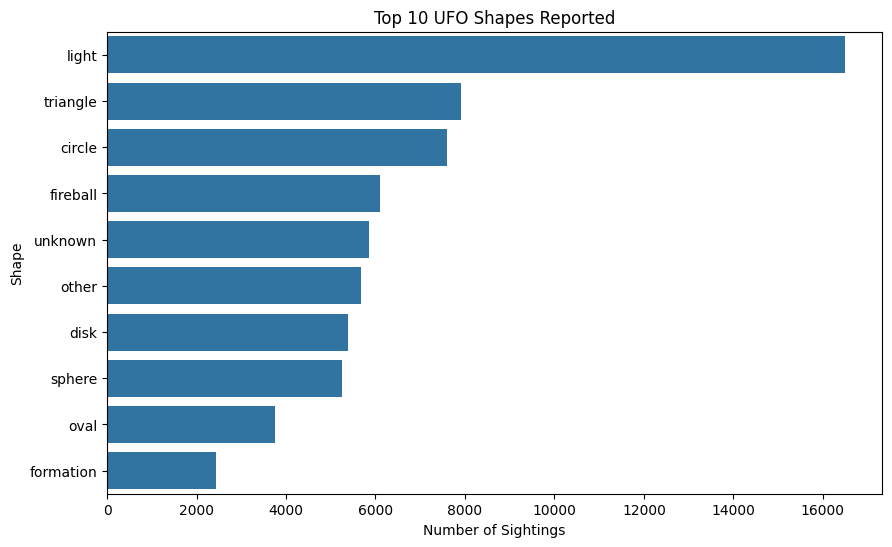

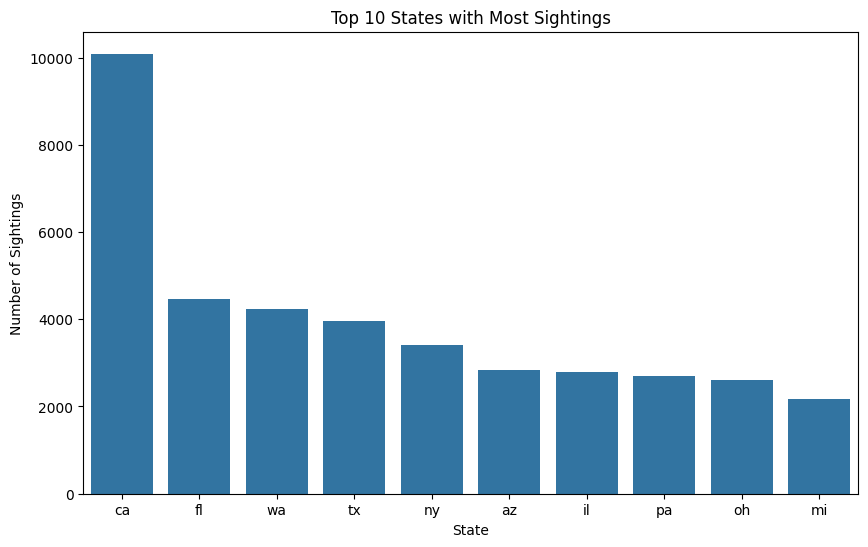

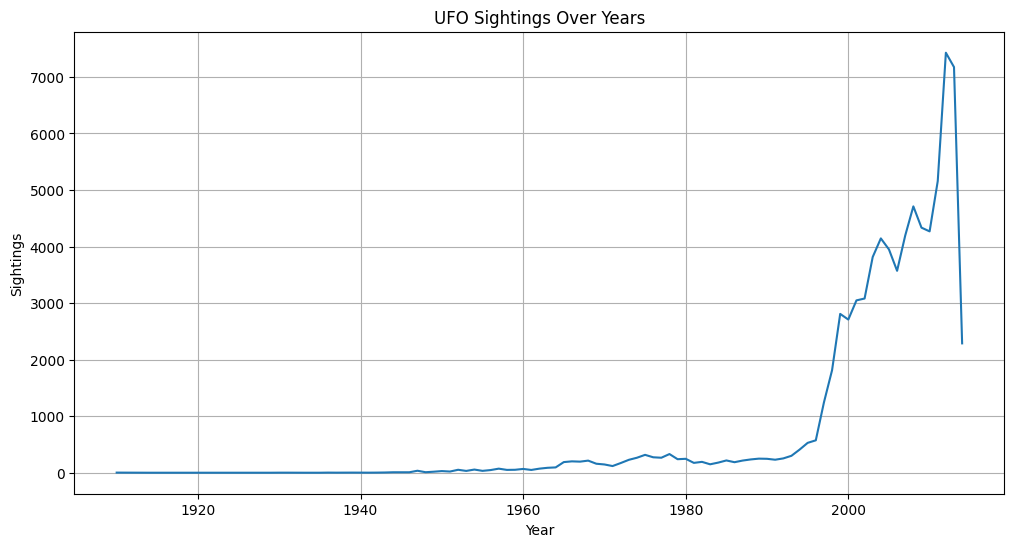

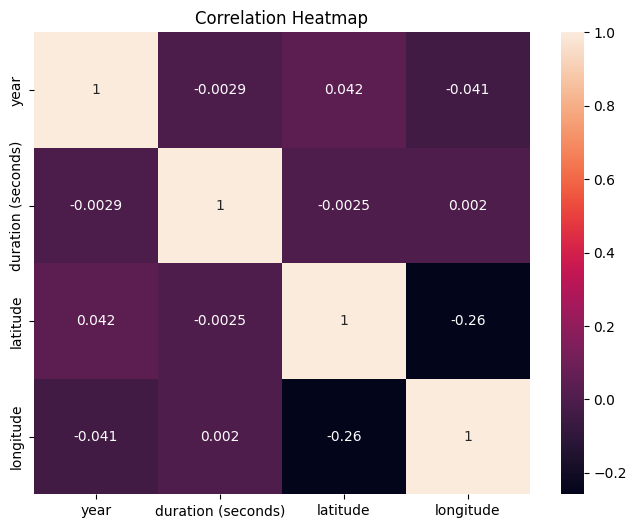

All graphs generated successfully!


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,1961


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = 'complete.csv'

df = pd.read_csv(file_name, low_memory=False, on_bad_lines='skip')

df['datetime'] = df['datetime'].astype(str).str.replace('24:00', '00:00')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

df['year'] = df['datetime'].dt.year
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

df = df.dropna(subset=['shape','state','year'])


# ------------------ GRAPH 1 ------------------
plt.figure(figsize=(10,6))
shape_counts = df['shape'].value_counts().head(10)
sns.barplot(x=shape_counts.values, y=shape_counts.index)
plt.title('Top 10 UFO Shapes Reported')
plt.xlabel('Number of Sightings')
plt.ylabel('Shape')
plt.savefig("top_shapes.png")
plt.show()

# ------------------ GRAPH 2 ------------------
plt.figure(figsize=(10,6))
state_counts = df['state'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States with Most Sightings')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.savefig("top_states.png")
plt.show()

# ------------------ GRAPH 3 ------------------
plt.figure(figsize=(12,6))
df['year'].value_counts().sort_index().plot(kind='line')
plt.title('UFO Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.grid(True)
plt.savefig("ufo_trend.png")
plt.show()

# ------------------ GRAPH 4 : CORRELATION HEATMAP ------------------

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

plt.figure(figsize=(8,6))

sns.heatmap(
    df[['year','duration (seconds)','latitude','longitude']].corr(),
    annot=True
)

plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

print("All graphs generated successfully!")
df.shape
df.head()
